<a href="https://colab.research.google.com/github/thiagocquinto/datascience/blob/main/MVP1_Thiago_Quinto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP de Análise de Dados e Boas Práticas

**Thiago Correa do Quinto**

#1. Definição do Problema

O dataset utilizado neste projeto será o **Productivity Prediction of Garment Employees**. Este conjunto de dados da indústria de vestuário pode ser usado para fins de regressão, prevendo a faixa de produtividade (0-1) ou para fins de classificação, transformando a faixa de produtividade (0-1) em diferentes classes, dos quais pode ser utilizada a abordagem de aprendizagem supervisionada.

A indústria do vestuário é um dos principais exemplos da globalização industrial desta era moderna. É uma indústria altamente dependente de  mão-de-obra pois possui muitos processos manuais. 

Deste modo, para atender a enorme demanda global por produtos de vestuário depende principalmente do desempenho de produção e entrega dos funcionários nas empresas de fabricação de roupas. Portanto, é altamente desejável entre os tomadores de decisão na indústria de vestuário rastrear, analisar e prever o desempenho da produtividade das equipes de trabalho em suas fábricas. 

Para mais detalhes sobre este dataset, consulte: https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#


**Informações sobre os atributos:**

1. **date :** Data no formato original MM-DD-YYYY (de 01-01-2015 a 03-11-2015)
2. **day :** Dia da semana
3. **quarter :** Uma porção do mês. Um mês é divido em 4 ou 5 partes de 7 dias cada
4. **department :** Departamento associado com a instância
5. **team_no :** número da equipe associada com a instância
6. **no_of_workers :** Número de trabalhadores em cada equipe
7. **no_of_style_change :** Número de mudanças no estilo em um determinado produto
8. **targeted_productivity :** Meta de Produtividade por equipe por dia
9. **smv :** Tempo alocado para uma tarefa em minutos
10. **wip :** Trabalho em progresso. Inclui o número de itens não finalizados por produtos
11. **over_time :** Quantidade de horas extras por equipe em minutos
12. **incentive :** Quantidade de incentivo financeiro (em BDT) que permite ou motiva um determinado curso de ação
13. **idle_time :** Quantidade de tempo de interrupção de produção por diversos motivos
14. **idle_men :** Número de trabalhadores que ficaram ociosos devido à interrupção da produção
15. **actual_productivity :** % atual da produtividade entregue pelos trabalhadores. Ela varia de 0-1.

In [177]:
# importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder # para onehotenconder
from sklearn.linear_model import LinearRegression # Será utilizada a regressão linear
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste
from sklearn.metrics import confusion_matrix # para a exibição da matriz de confusão do modelo
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.svm import SVC # para utilizar o algoritmo SVM


In [178]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

#2. Carga de Dados

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv já com os cabeçalhos

In [179]:
# importando dados de url para um dataframe

# url a importar
url_dados='https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv'

# carga do dataset através da url - foi utilizado o parâmetro parse_dates para 
# já converter o formato para data da coluna date
workers=pd.read_csv(url_dados, parse_dates=['date'])

display(workers.head(20)) # foram carregadas 20 linhas para ter uma visão melhor dos dados do dataset

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,2015-01-01,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,2015-01-01,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,2015-01-01,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,2015-01-01,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,2015-01-01,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


Para ter uma ideia de como os dados estão organizados, carregamos as 20 primeiras linhas. Podemos perceber que quase todos as equipes (team) são alocados no mesmo dia e às vezes em mais de um departamento.

#3. Análise de Dados

##3.1. Estatísticas Descritivas
Vamos examinar o dataset para obter informações sobre o conjunto de dados

In [180]:
print(workers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

O dataset tem dimensão de 1197 linhas por 15 colunas com série temporal. Dentro destas colunas temos dados do tipo *string*, *float* e *inteiros*. A coluna **'wip'** tem dados nulos. A coluna **'date'** retrata a série temporal do dados. Como a coluna team não se trata de número, mas sim IDs das equipes, devemos converter de *float* para *string*. 

In [181]:
workers['team']=workers['team'].astype(str)
print(workers.dtypes)

date                     datetime64[ns]
quarter                          object
department                       object
day                              object
team                             object
targeted_productivity           float64
smv                             float64
wip                             float64
over_time                         int64
incentive                         int64
idle_time                       float64
idle_men                          int64
no_of_style_change                int64
no_of_workers                   float64
actual_productivity             float64
dtype: object


A seguir vamos resumir algumas propriedades estatísticas do dataset (média, desvio padrão, mínimo, máximo e os quartis).

In [182]:
display(workers.describe())

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Destaque para alguns candidatos a *outliers* e possibilidade de tratamento dos dados nulos em **wip**. Nas colunas **idle_time** e **idle_men** tem um elevado número de zeros.

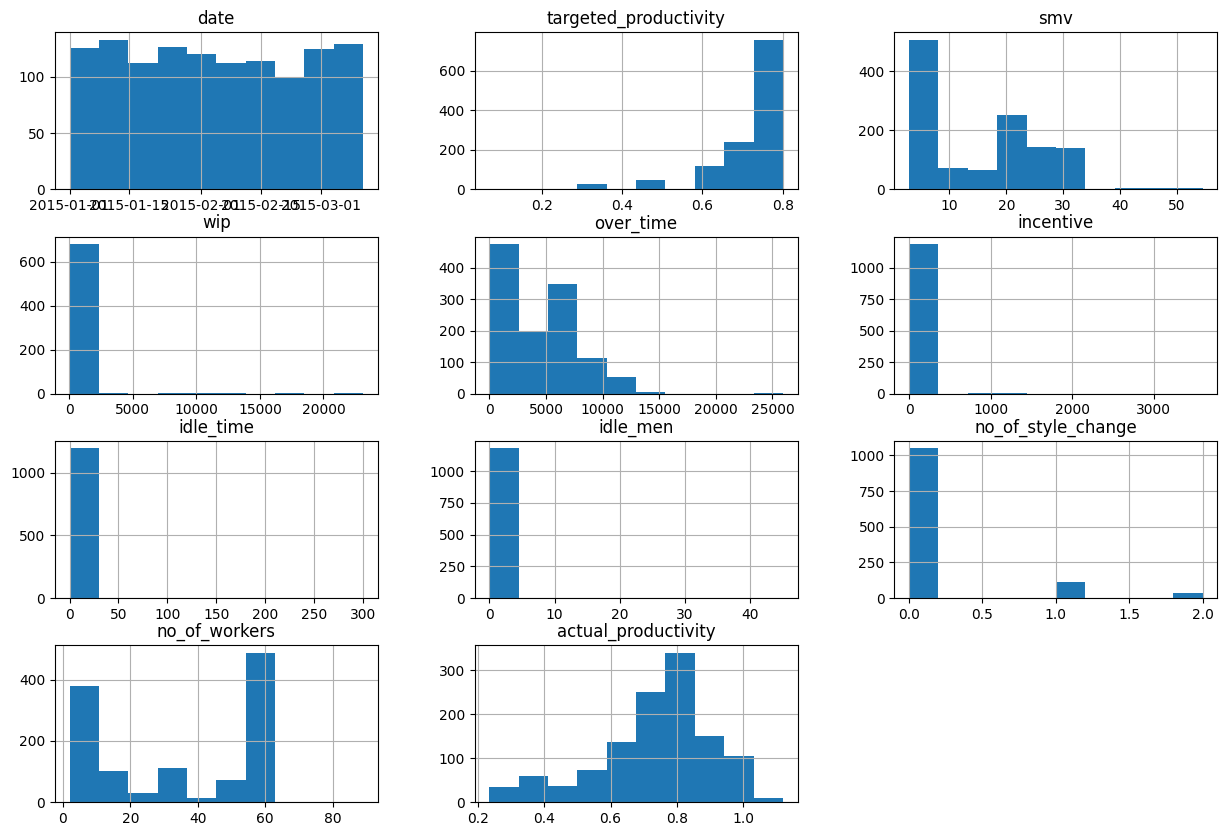

In [183]:
workers.hist(figsize = (15,10));

Podemos perceber graficamente pelos histogramas que as colunas **wip**, **incentive**, **idle_time**, **idle_men** possuem um elevado número de valores próximos a zero. O número de registro por data parece ser constante. A coluna **target_productivity** apresenta uma concentração de valores entre 0.6 e 0.8 e valores baixos para uma meta (menor do que 0.5), o que pode ser uma entrada de dados errados no dataset. A coluna **no_of_style_change** parece ter apenas 3 valores (0, 1 e 2), o que será explorado na próxima seção. A concentração de valores da coluna **actual_productivity** parece normal levemente deslocada para direita. As demais colunas aparentam ter uma distribuição exponencial. 


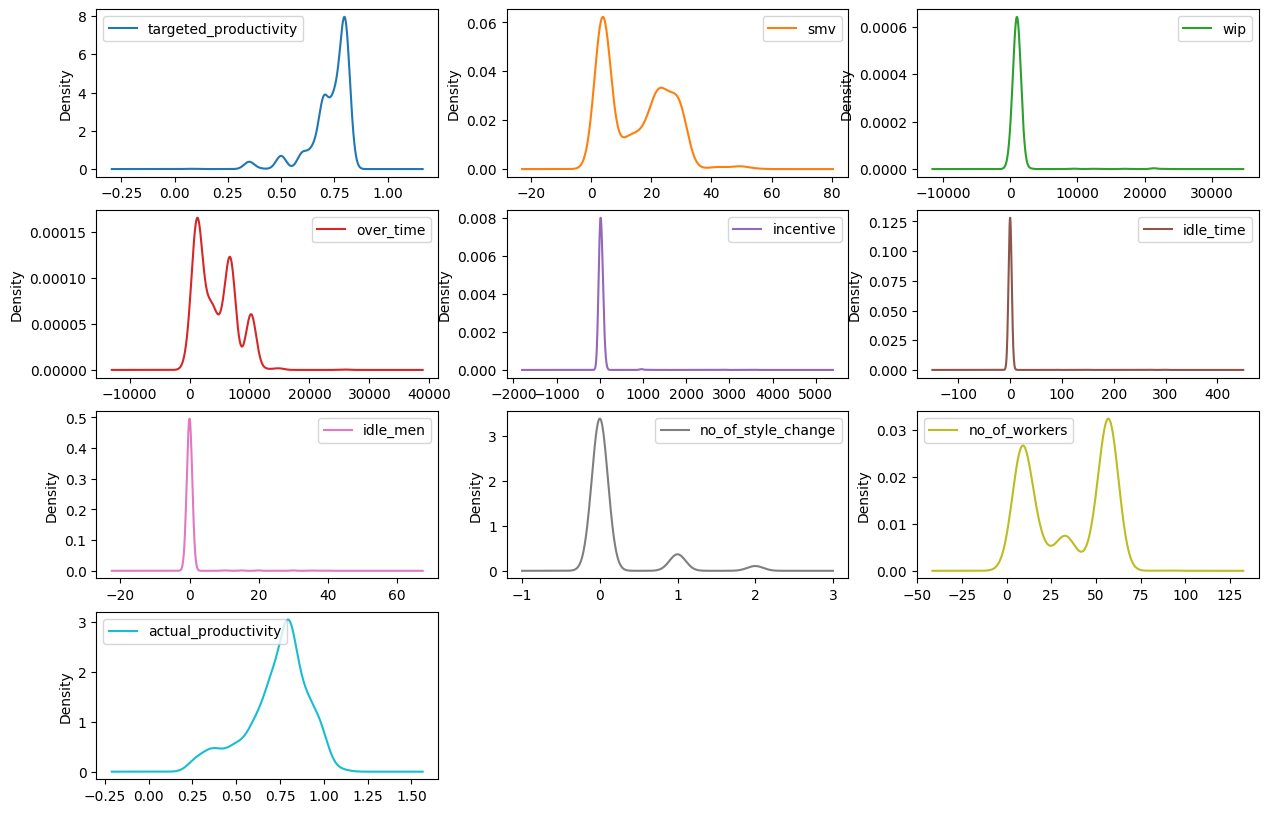

In [184]:
# Gráfico de Densidade
# Foi removida da análise a coluna 'date' através da função iloc
workers.iloc[:,1:].plot(kind = 'density', subplots = True, layout = (4,3), sharex = False, figsize = (15,10)) 
plt.show()

Pelos gráficos de densidade de frequência, podemos percerber as concentrações dos valores das principais colunas, reforçando as informações já apresentadas no histograma, tais como elevado número de zeros nas colunas **wip**, **incentive**, **idle_time**, **idle_men**, concentração da meta e do realizado de produtividade em torno de 75%, na coluna **no_of_style_change** concentrados em 0, 1 e 2 e concentração do número de trabalhadores (**no_of_workers**) em torno do primeiro e terceiro quartil.


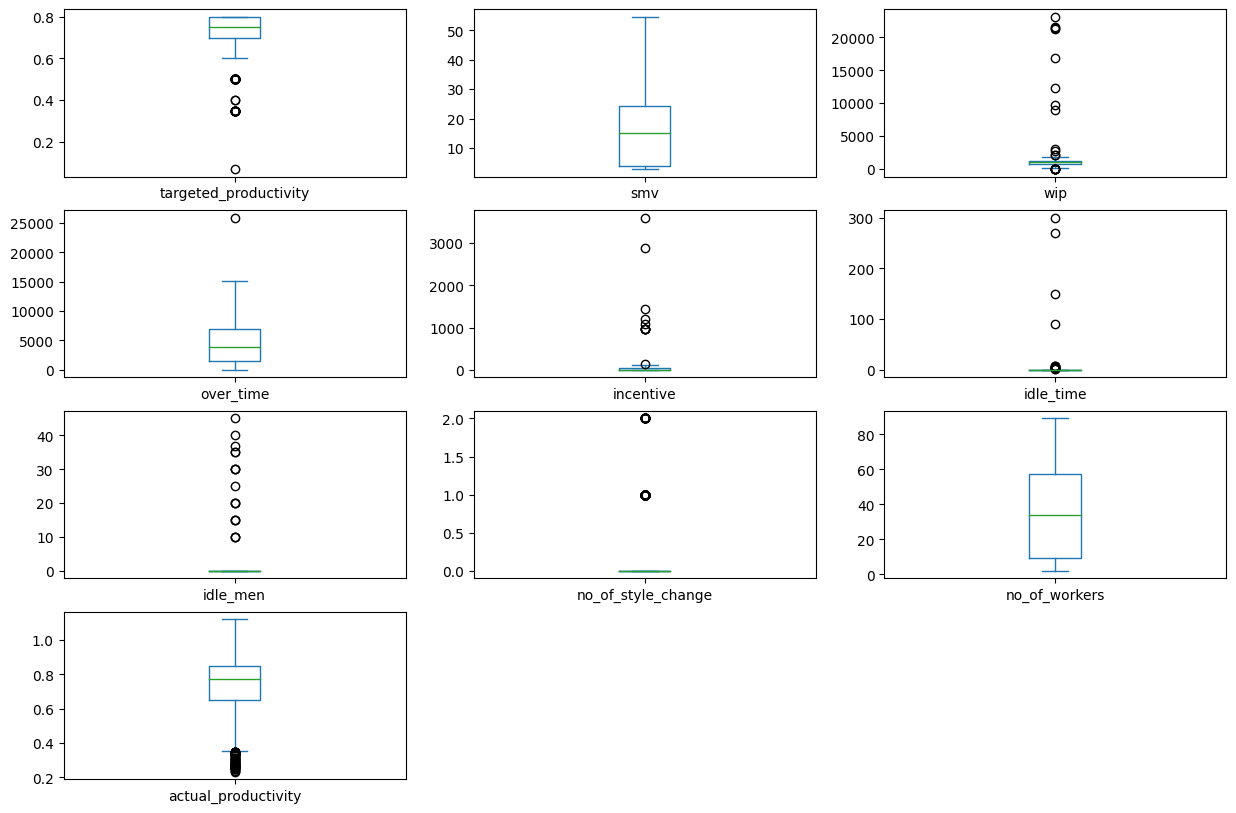

In [185]:
# Boxplot
# Foi retirada a coluna date para gerar os gráficos de boxplots
workers.iloc[:,1:].plot(kind = 'box', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Nos gráficos de boxplots podemos identificas algumas particularidades. 

Nas colunas **targeted_productivity**, **smv**, **over_time**, **no_of_workers** e **actual_productivity** apresentam um gráfico bem definido com fácil identificação dos *outliers*, quando existem, e os limites de concentração dos dados.

Já nas colunas **wip**, **incentive**, **idle_time**, **idle_men** e **no_of_style_change** apresentam um resultado que requer um tratamento extra, como retirar *outliers* ou utilizar outro tipo de representação, que serão tratados nas próximas seções.


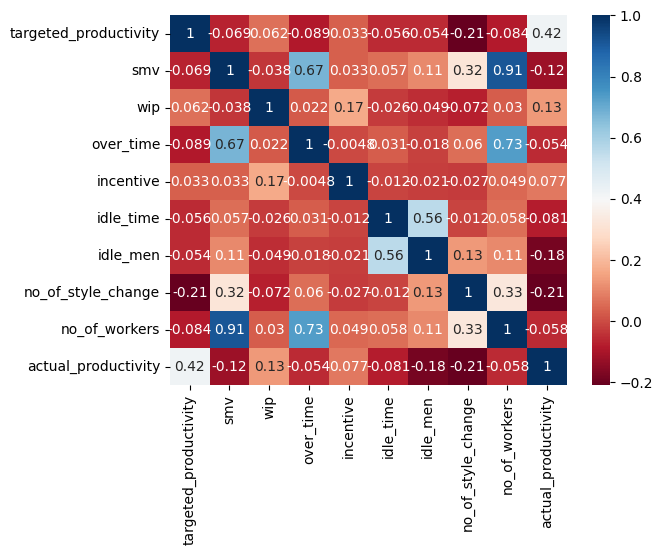

In [186]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(workers.corr(), annot=True, cmap='RdBu');

Como podemos verificar, existe uma alta correlação positiva entre **over_time** e **smv**, **no_of_workers** e **smv**, **no_of_workers** e **over_time**, uma média correlação entre **idle_men** e **idle_time**, **actual_productivity** e **targeted_productivity**. Existe uma baixa correlação negativa entre **actual_productivity** e **idle_men**, **actual_productivity** e **no_of_style_change**, que está distorcida em função da escala do mapa de calor.

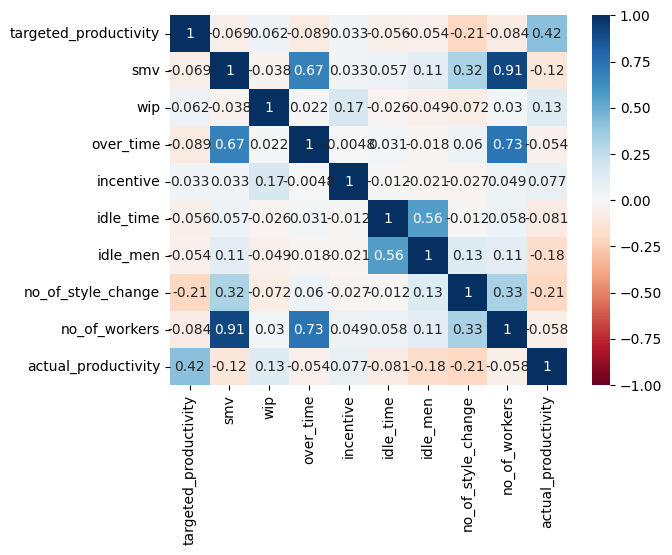

In [187]:
# Matriz de Correlação com Matplotlib Seaborn - mudança de escala de cores entre -1 e 1
sns.heatmap(workers.corr(), annot=True, cmap='RdBu',vmin=-1, vmax=1);

Neste novo mapa de calor, foi normalizado os valores extremos para ficar entre -1 e 1, e, desta forma, tirar o efeito visual das baixas correlações negativas.

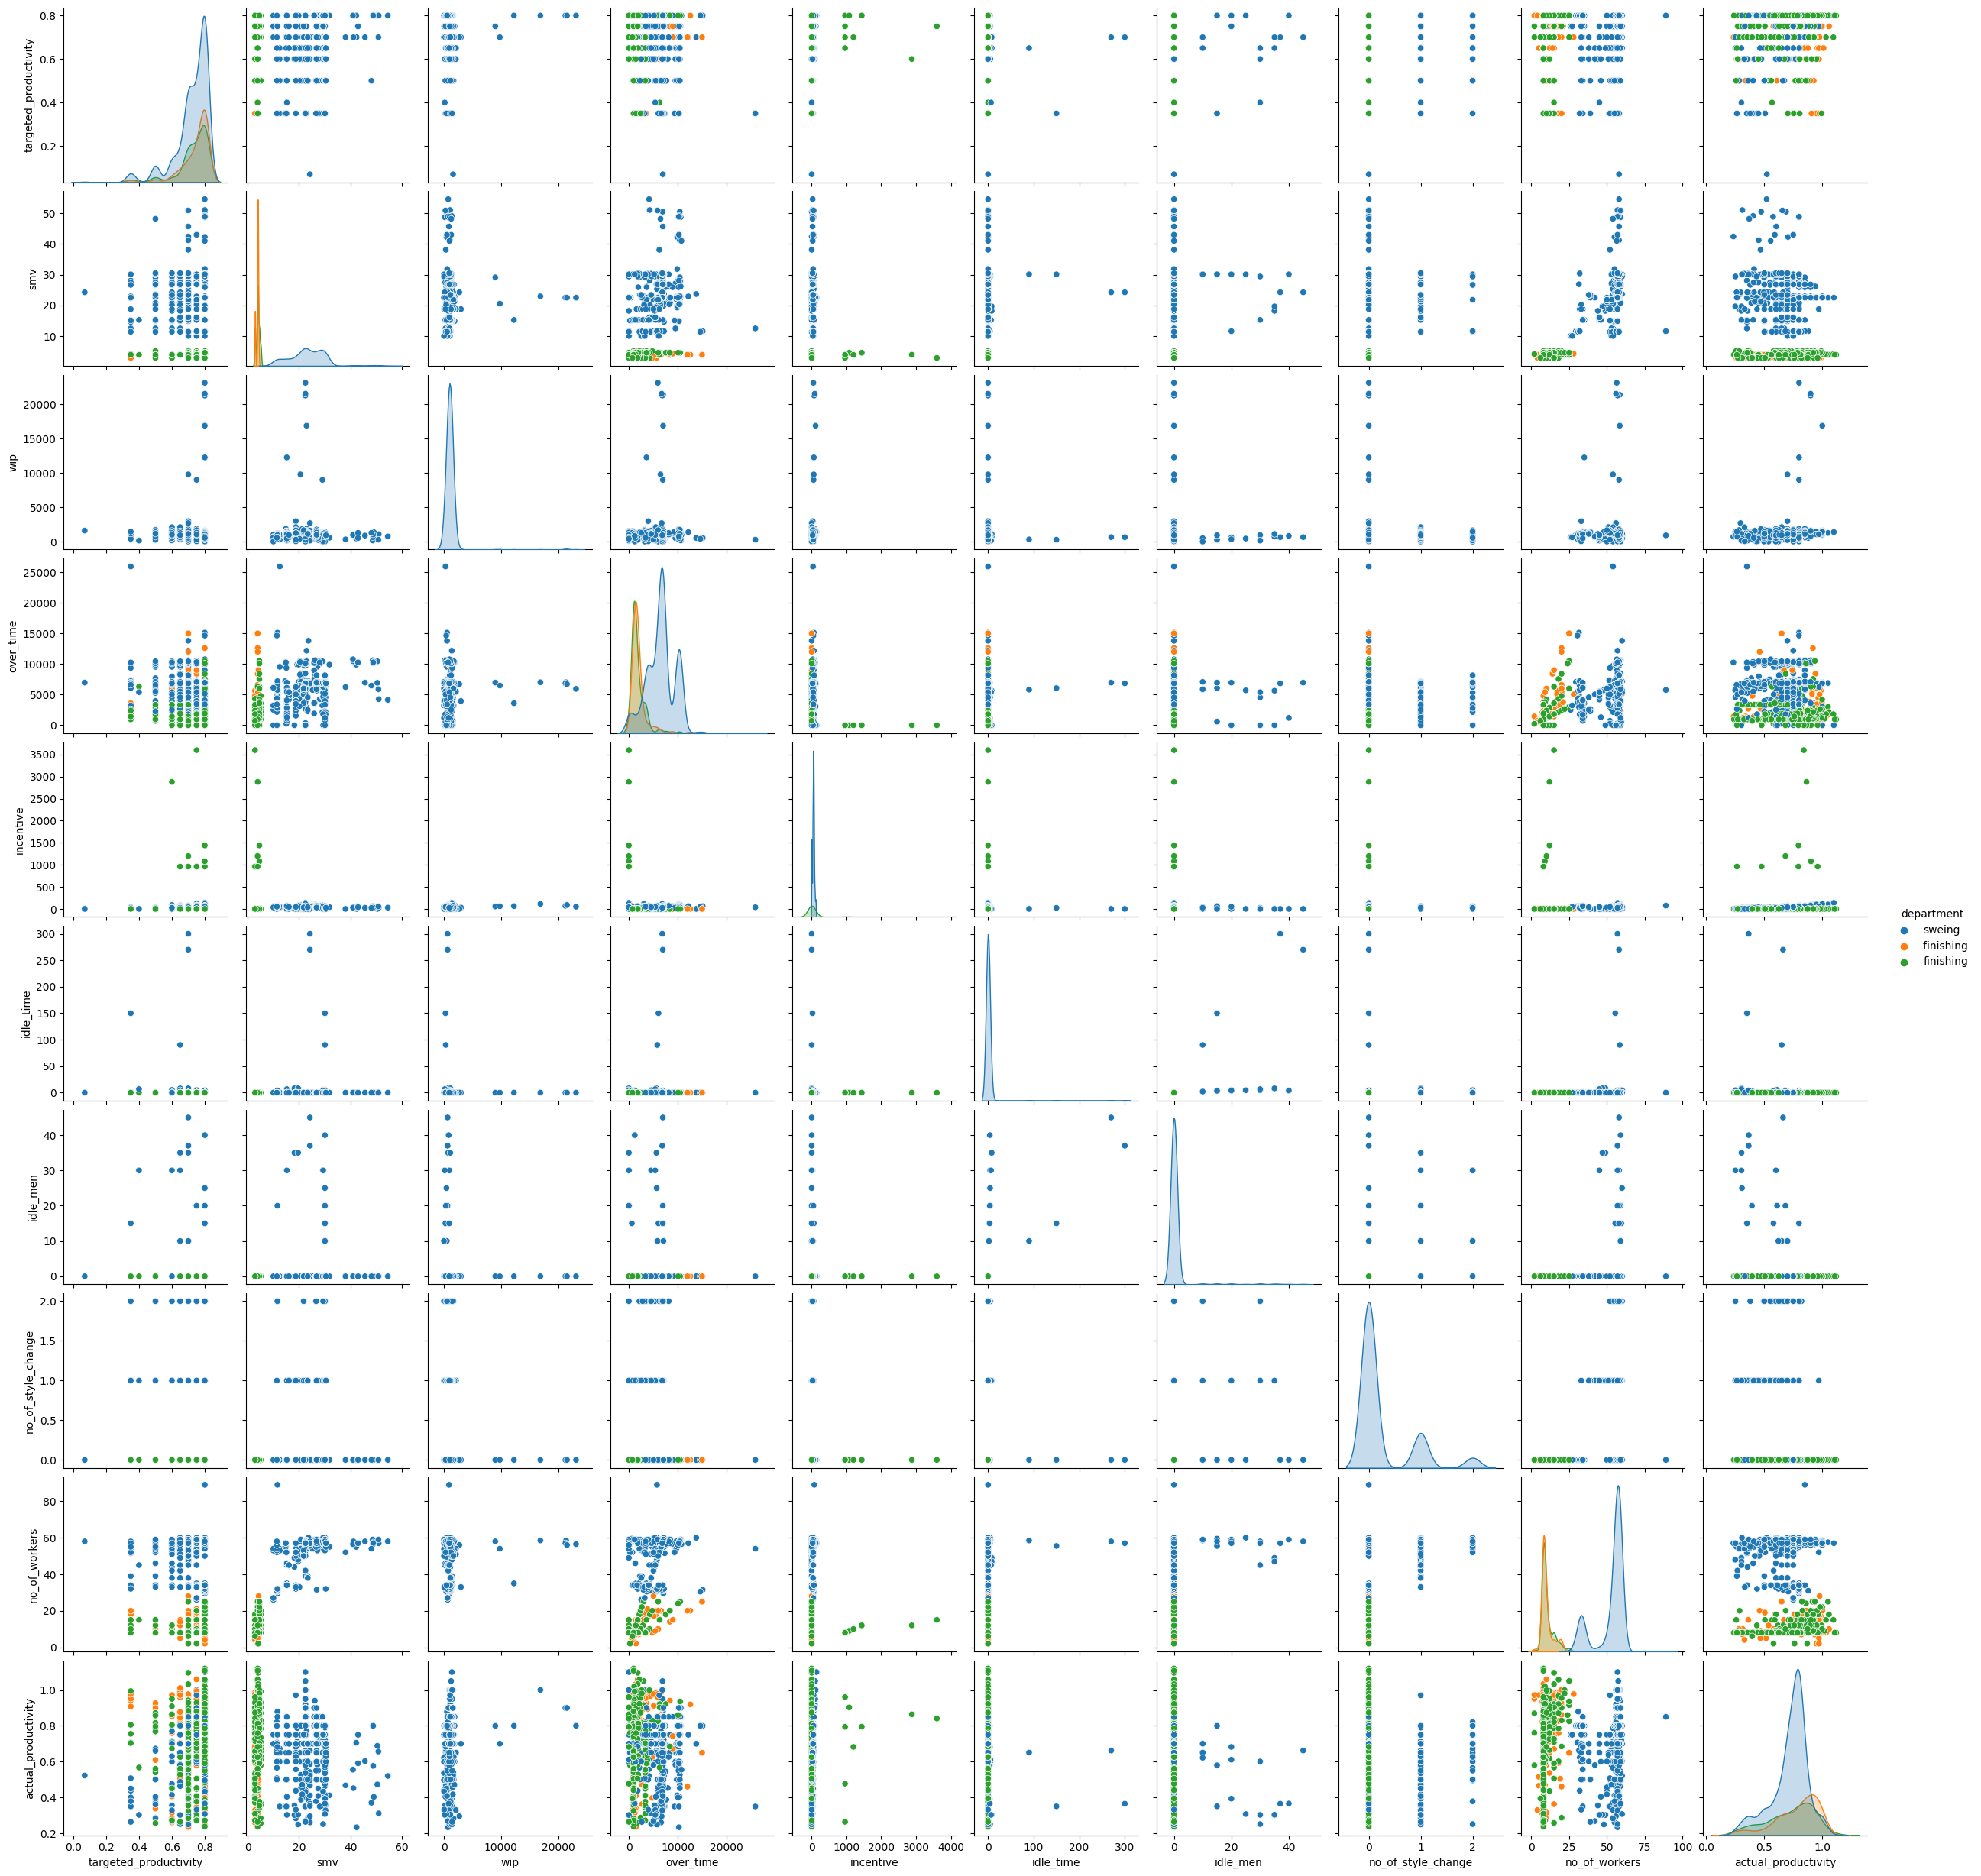

In [188]:
# Scatter Plot com Seaborn
# Esses dados serão mais explorados na próxima seção
sns.pairplot(workers,hue='department');

Nestes gráficos, percebemos que ainda é necessário um tratamento dos dados para tirarmos conclusões mais assertivas, como tratamento dos dados categóricos. Detalhe que para esse elevado número de atributos numéricos, é necessário realizar diversas montagens dos dados, filtrando pelos atributos categóricos.

#4. Pré-Processamento de dados



##4.1. Tratamento de Missings e Limpeza

In [189]:
# verificando nulls no dataset
workers.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

Foi identificado que a coluna **wip** possui 506 valores nulos

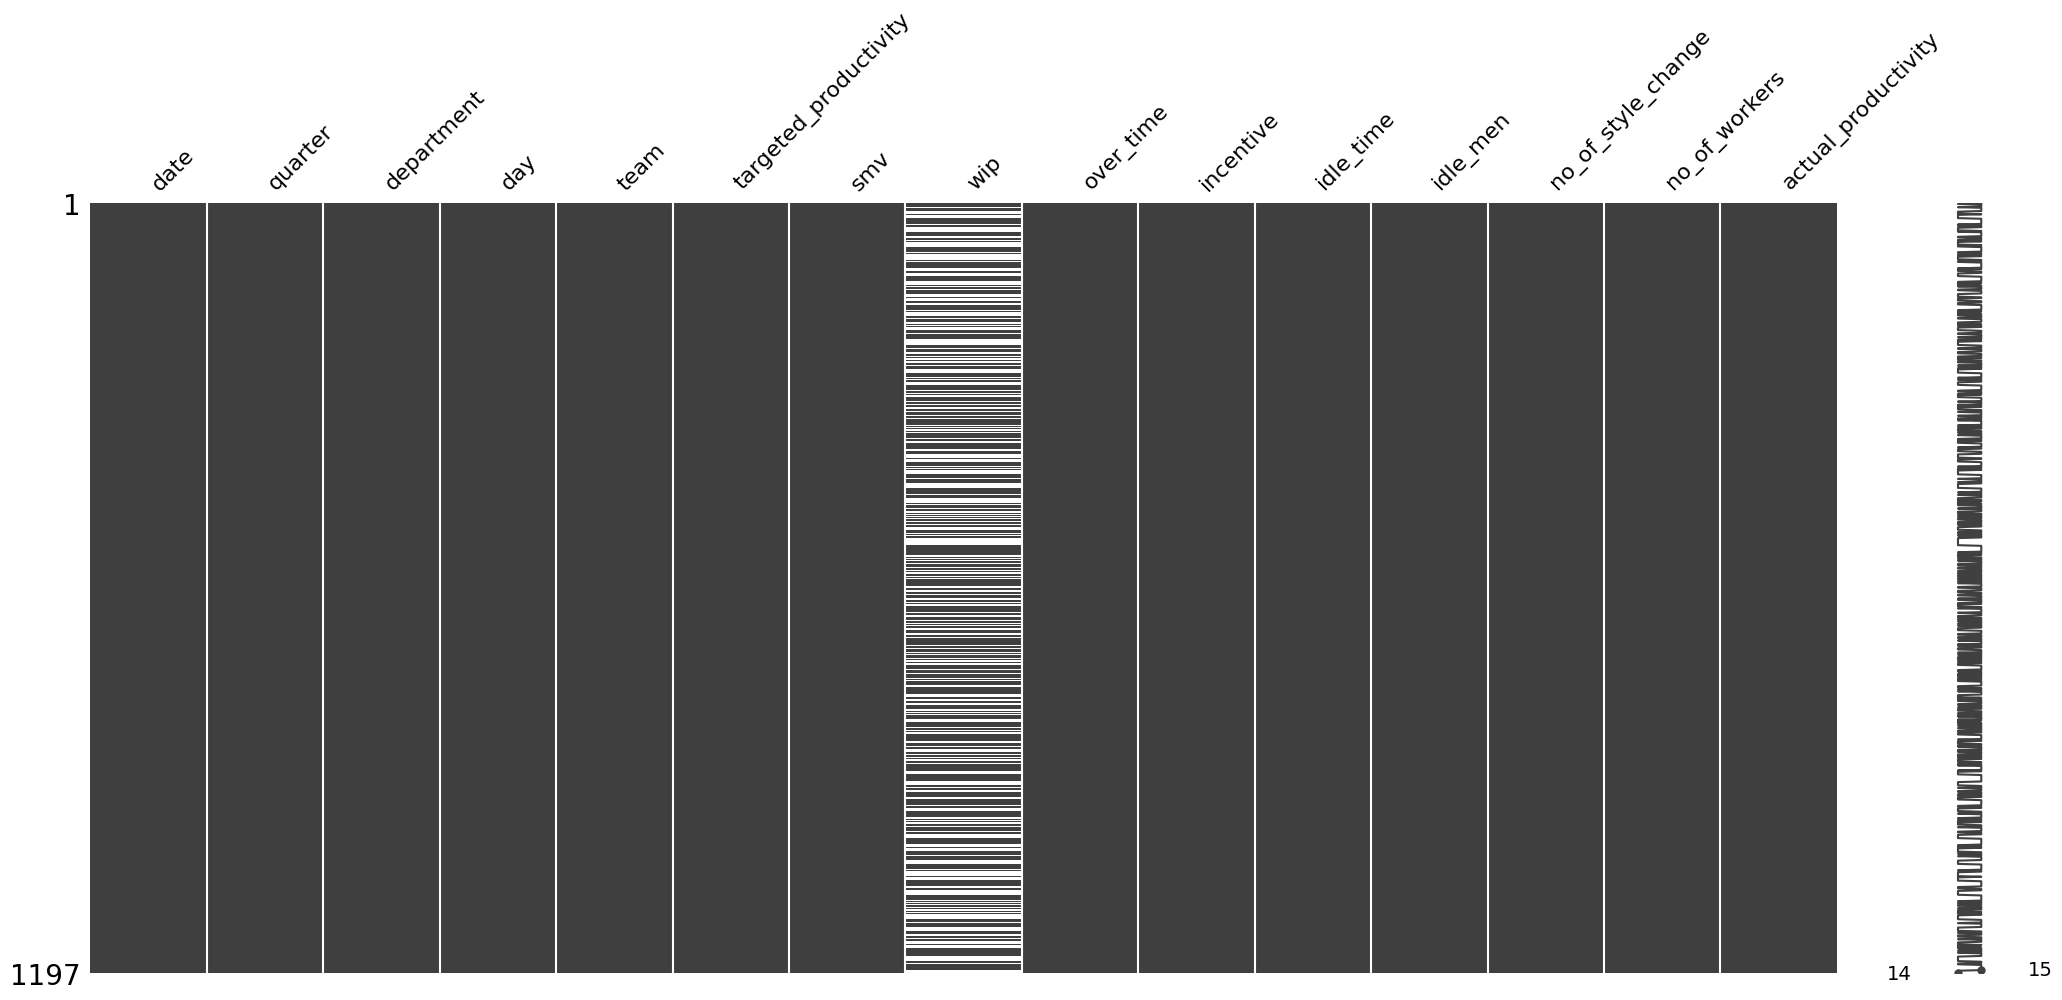

In [190]:
# salvando um NOVO dataset para tratamento de missings

# recuperando os nomes das colunas
colunas = list(workers.columns)

# o novo dataset irá conter todas as colunas
dataset = workers.copy()

# exibindo visualização matricial da nulidade do dataset
ms.matrix(dataset);

Como por definição a coluna **'wip'** é o número de itens faltantes e como pelos dados estatísticos básico o menor valor é 7, a ausência de valores significa que tem 0 itens faltantes. Desta forma, vamos substituir o **NaN** por **zeros**.

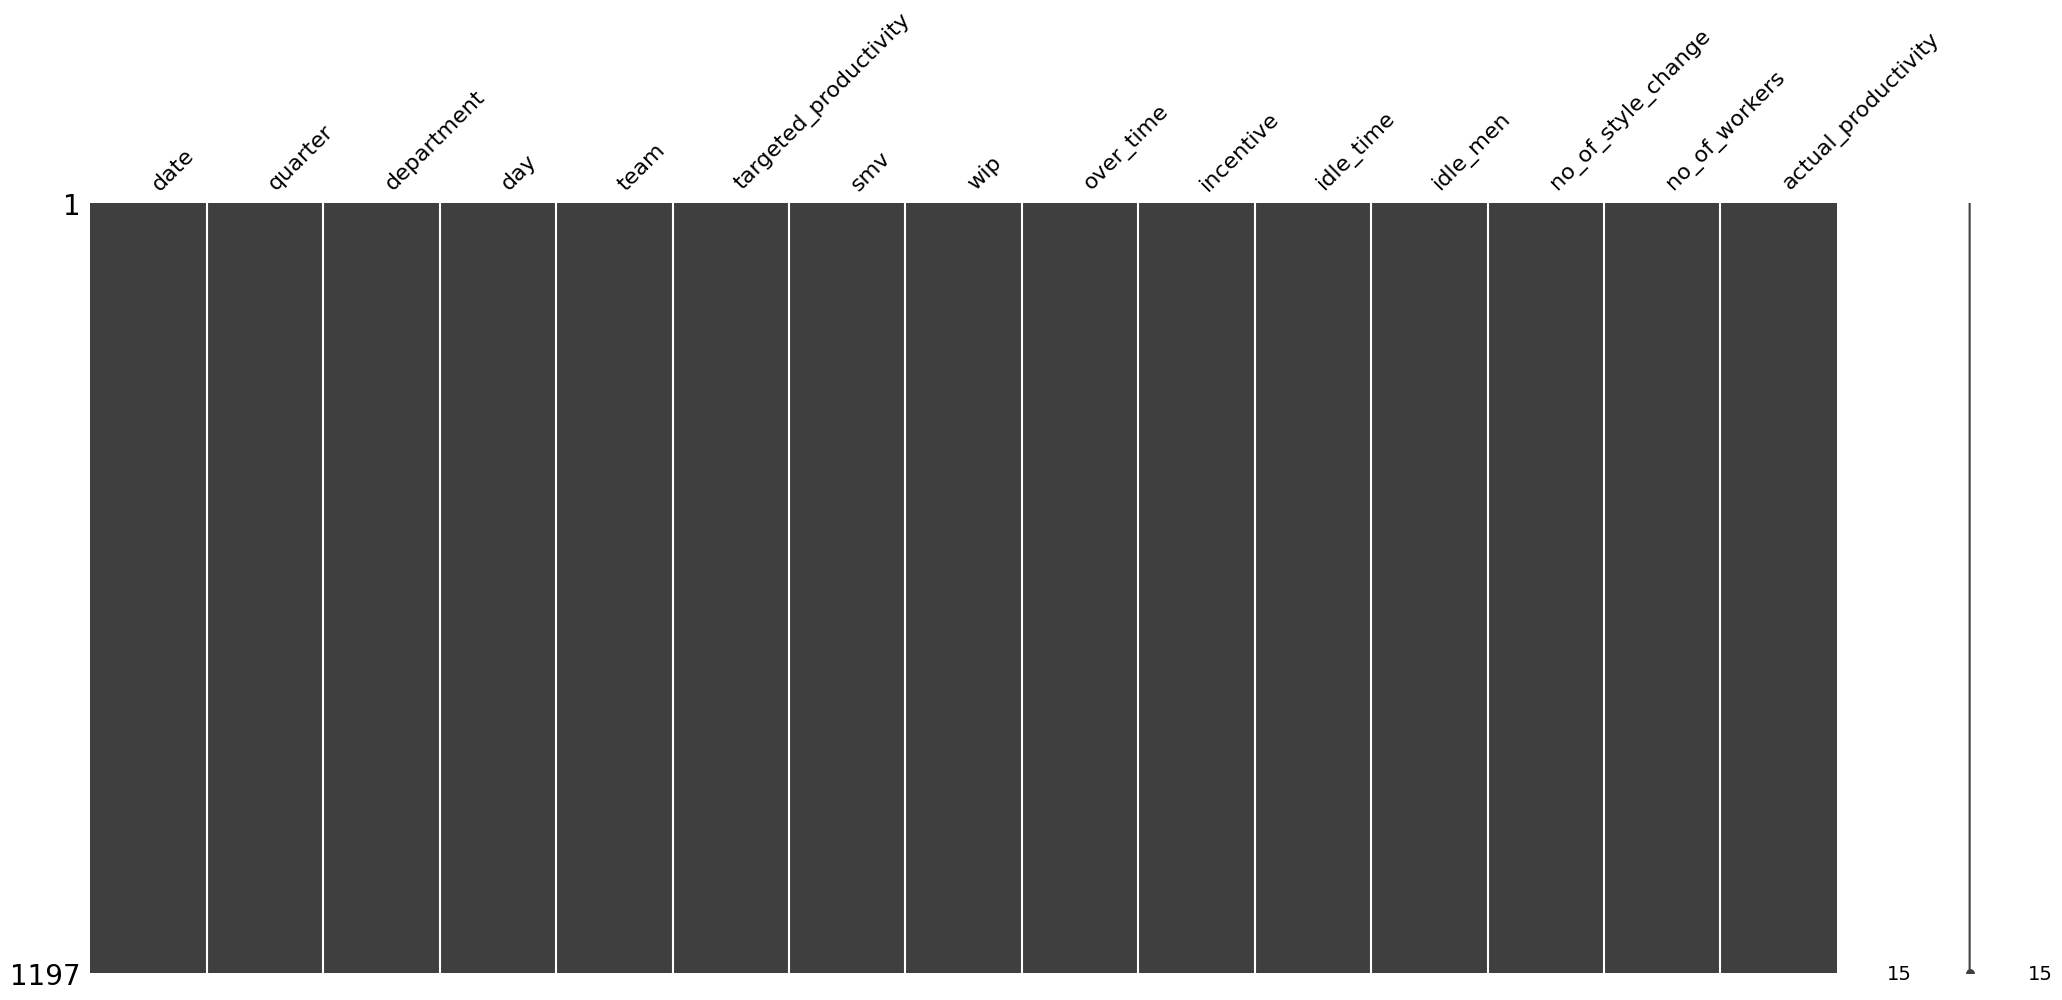

In [191]:
# substituindo os NaN de 'wip' por 0
dataset['wip'].fillna(0, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(dataset);

Outra análise que iremos realizar é sobre os atributos categóricos do dataset que são descritos nas colunas **quarter**, **department**, **day**, **team** e **no_of_style_change**

In [192]:
print(dataset.nunique(axis=0))
print('\nColuna quarter')
print(dataset.quarter.unique())
print('\nColuna department')
print(dataset.department.unique())
print('\nColuna day')
print(dataset.day.unique())
print('\nColuna team')
print(np.sort(dataset.team.unique()))
print('\nColuna no_of_style_change')
print(np.sort(dataset.no_of_style_change.unique()))

date                      59
quarter                    5
department                 3
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      549
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

Coluna quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']

Coluna department
['sweing' 'finishing ' 'finishing']

Coluna day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

Coluna team
['1' '10' '11' '12' '2' '3' '4' '5' '6' '7' '8' '9']

Coluna no_of_style_change
[0 1 2]


Como podemos perceber, precisamos corrigir o valor duplicado na coluna **'department'** ('finishing ' e 'finishing'), retirando o espaço desnecessário. A coluna **no_of_style_change** pode ser reclassificada como atributo categórico ao invés de numérica, desta forma, devemos alterar o tipo de dado, como já foi feito com a coluna **team**. Outro fato interessante, é que não existe registro para a sexta-feira (Friday), que pode ser a folga semanal da empresa.

In [193]:
# Removendo espaços desnecessários nas strings - remover espaços à esquerda e à direita
dataset['department']=dataset['department'].str.strip()

# Corrigir a gravia da categoria department de sweing para sewing:
dataset['department'] = dataset['department'].replace({'sweing':'sewing'})
print(dataset.department.unique()) # verificação da mudança na categoria

['sewing' 'finishing']


In [194]:
# Mudança do tipo de dados da coluna no_of_style_change
dataset['no_of_style_change']=dataset['no_of_style_change'].astype('str')

In [195]:
# Conferir de todas as mudanças foram realizadas
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   object        
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   object        
 13  no_

##4.2. Tratamento de *Outliers*

Vamos utilizar o método do boxplot para identificação e eliminação de *outliers*. Vamos utilizar a aplicação única e direta no atributo desejado, no entanto esta técnica pode precisar de um processo iterativo para convergência e remoção de todos os *outliers* se necessário.

In [196]:
def retirar_outliers(dados,coluna):
  """
  Função para retirar os outliers conforme método boxplot de colunas simples
  q1: primeiro quartil
  q3: terceiro quartil
  iqr: diferença entre o terceiro e o primeiro quartil, que representa 
    50% dos dados da distribuição
  limite_inferior: primeiro quartil menos 1,5 IQR
  limite_superior: terceiro quartil mais 1,5*IQR

  Args:
        dados (dataframe): dataframe do qual deve ser feita a remoção de outliers
        coluna (string): nome da coluna do dataframe

    Returns:
        dados_sem_outliers (dataframe): dataframe com os outliers da coluna selecionada removidos
  """
  q1=dados[coluna].quantile(0.25)
  q3=dados[coluna].quantile(0.75)
  iqr=q3-q1
  limite_inferior=q1-1.5*iqr
  if limite_inferior<dados[coluna].min():
    limite_inferior=dados[coluna].min()
  limite_superior=q3+1.5*iqr
  if limite_superior>dados[coluna].max():
    limite_superior=dados[coluna].max()
  dados_sem_outliers=dados[(dados[coluna]>=limite_inferior) & (dados[coluna]<=limite_superior)]
  return dados_sem_outliers

Criada função *retirar_outliers* para automatizar o processo de retirada de *outliers* através do método de boxplot com a coluna desejada como entrada. Para alguns casos, são retirados os zeros para avaliar possíveis distorções da distribuição dos dados.

Dataset Original: 1197
Dataset sem outliers: 1188
Dataset sem outliers e sem zeros: 669


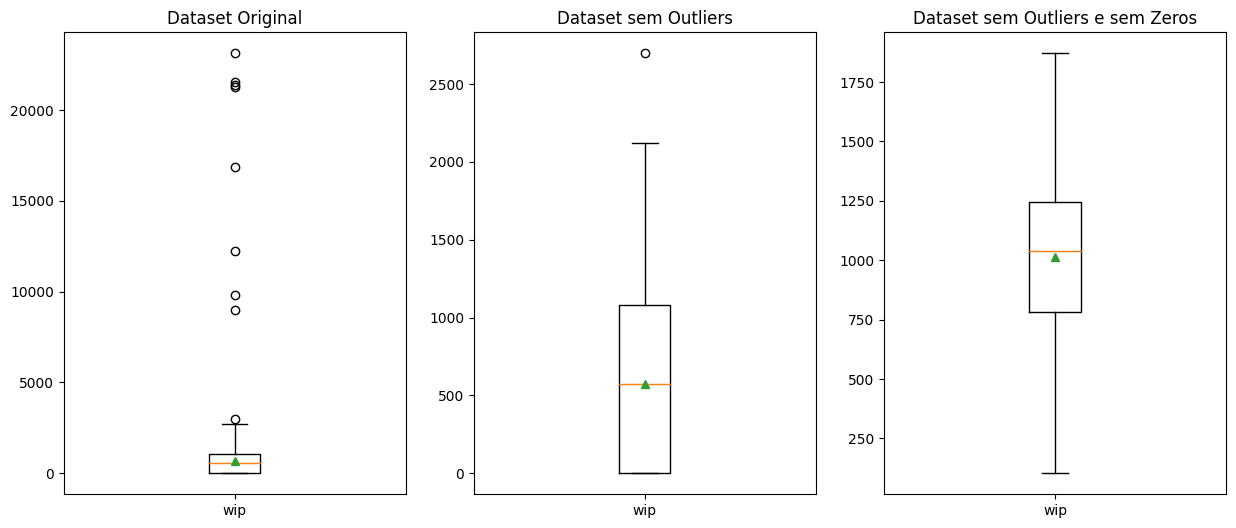

In [197]:
# Retirar os outliers da coluna wip
# seleciona a coluna
coluna='wip' 

# utiliza a função retirar_outliers usando o argumento do dataset e a coluna selecionada
dataset_wip_sem_outliers=retirar_outliers(dataset,coluna) 

# utiliza a função retirar_outliers usando o argumento do dataset filtrado sem os zeros e a coluna selecionada
dataset_wip_sem_outliers_zeros=retirar_outliers(dataset[dataset[coluna]>0],coluna) 

# cria 3 subplots: Dataset Original, Dataset sem Outliers e Dataset sem Outliers e sem Zeros
fig, axes=plt.subplots(nrows=1, ncols=3,figsize=(15,6)) 

# plota o boxplot no primeiro gráfico - detalhe que a média foi incluida
axes[0].boxplot(dataset[coluna], showmeans=True); 
axes[0].set_title('Dataset Original');
axes[0].set_xticklabels([coluna]);

# plota o boxplot no segundo gráfico - detalhe que a média foi incluida
axes[1].boxplot(dataset_wip_sem_outliers[coluna], showmeans=True); 
axes[1].set_title('Dataset sem Outliers');
axes[1].set_xticklabels([coluna]);

# plota o boxplot no terceiro gráfico - detalhe que a média foi incluida
axes[2].boxplot(dataset_wip_sem_outliers_zeros[coluna], showmeans=True); 
axes[2].set_xticklabels([coluna]);
axes[2].set_title('Dataset sem Outliers e sem Zeros');

# Fazer a contagem de dados
print("Dataset Original: "+str(dataset[coluna].count()))
print("Dataset sem outliers: "+str(dataset_wip_sem_outliers[coluna].count()))
print("Dataset sem outliers e sem zeros: "+str(dataset_wip_sem_outliers_zeros[coluna].count()))

In [198]:
# Informação sobre o dataset sem outliers e sem zeros
dataset_wip_sem_outliers_zeros['wip'].describe()

count     669.000000
mean     1012.367713
std       341.511109
min       103.000000
25%       783.000000
50%      1039.000000
75%      1244.000000
max      1871.000000
Name: wip, dtype: float64

Para a coluna **wip** (o backlog dos itens) existem alguns dados que destoam significativamente do restante da amostra, que após primeira remoção de *outliers* ficou claro esta discrepância, que talvez sejam dados registrados de forma errada. O elevado número de zeros que foram inseridos na etapa anterior, também pesam na distribuição e após sua remoção fica claro que quando há backlog, eles ficam distribuidos entre 103 e 1871 itens.

Dataset Original: 1197
Dataset sem outliers: 1186
Dataset sem outliers e sem zeros: 559


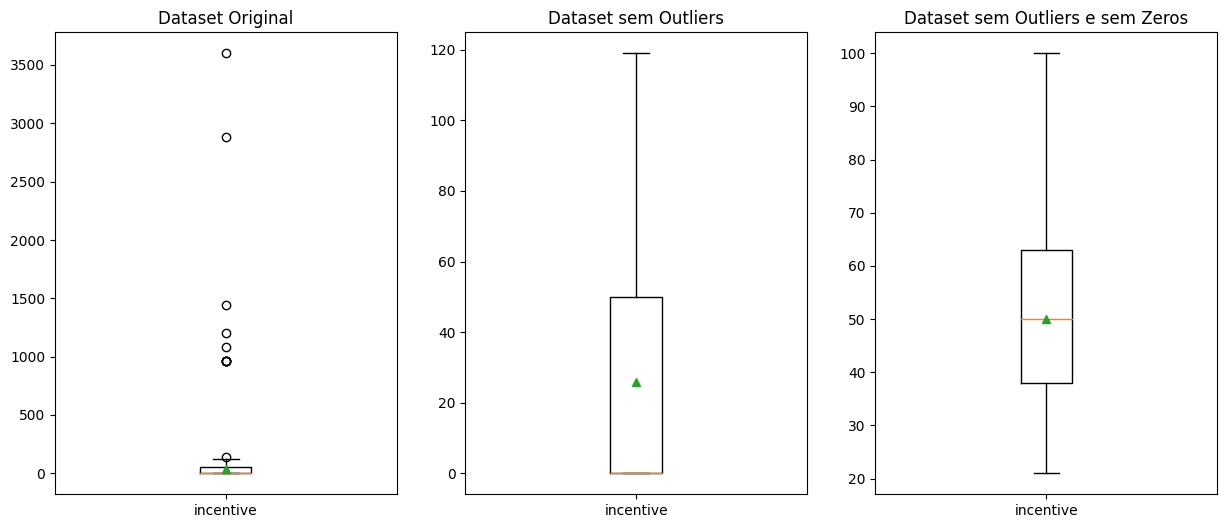

In [199]:
# Retirar os outliers da coluna incentive
coluna='incentive'
dataset_incentive_sem_outliers=retirar_outliers(dataset,coluna)
dataset_incentive_sem_outliers_zeros=retirar_outliers(dataset[dataset[coluna]>0],coluna)
fig, axes=plt.subplots(nrows=1, ncols=3,figsize=(15,6))
axes[0].boxplot(dataset[coluna], showmeans=True);
axes[0].set_title('Dataset Original');
axes[0].set_xticklabels([coluna]);
axes[1].boxplot(dataset_incentive_sem_outliers[coluna], showmeans=True);
axes[1].set_title('Dataset sem Outliers');
axes[1].set_xticklabels([coluna]);
axes[2].boxplot(dataset_incentive_sem_outliers_zeros[coluna], showmeans=True);
axes[2].set_xticklabels([coluna]);
axes[2].set_title('Dataset sem Outliers e sem Zeros');

print("Dataset Original: "+str(dataset[coluna].count()))
print("Dataset sem outliers: "+str(dataset_incentive_sem_outliers[coluna].count()))
print("Dataset sem outliers e sem zeros: "+str(dataset_incentive_sem_outliers_zeros[coluna].count()))

In [200]:
dataset_incentive_sem_outliers_zeros['incentive'].describe()

count    559.000000
mean      50.069767
std       17.754614
min       21.000000
25%       38.000000
50%       50.000000
75%       63.000000
max      100.000000
Name: incentive, dtype: float64

Da mesma forma que o item anterior, a coluna **incentive** apresenta alguns dados bem discrepantes e uma grande influência do zeros.

Dataset Original: 1197
Dataset sem outliers: 1179
Dataset sem outliers e sem zeros: 14


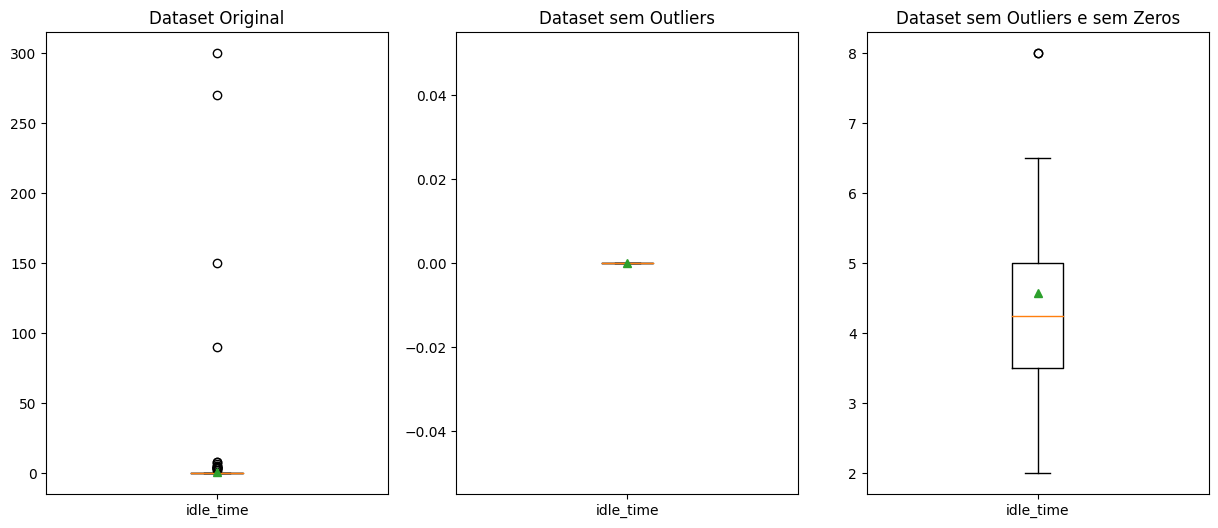

In [201]:
# Retirar os outliers da coluna idle_time
coluna='idle_time'
dataset_idle_time_sem_outliers=retirar_outliers(dataset,coluna)
dataset_idle_time_sem_outliers_zeros=retirar_outliers(dataset[dataset[coluna]>0],coluna)
fig, axes=plt.subplots(nrows=1, ncols=3,figsize=(15,6))
axes[0].boxplot(dataset[coluna], showmeans=True);
axes[0].set_title('Dataset Original');
axes[0].set_xticklabels([coluna]);
axes[1].boxplot(dataset_idle_time_sem_outliers[coluna], showmeans=True);
axes[1].set_title('Dataset sem Outliers');
axes[1].set_xticklabels([coluna]);
axes[2].boxplot(dataset_idle_time_sem_outliers_zeros[coluna], showmeans=True);
axes[2].set_xticklabels([coluna]);
axes[2].set_title('Dataset sem Outliers e sem Zeros');

print("Dataset Original: "+str(dataset[coluna].count()))
print("Dataset sem outliers: "+str(dataset_idle_time_sem_outliers[coluna].count()))
print("Dataset sem outliers e sem zeros: "+str(dataset_idle_time_sem_outliers_zeros[coluna].count()))

In [202]:
dataset_idle_time_sem_outliers_zeros['idle_time'].describe()

count    14.000000
mean      4.571429
std       1.859044
min       2.000000
25%       3.500000
50%       4.250000
75%       5.000000
max       8.000000
Name: idle_time, dtype: float64

A coluna **idle_time**, assim como a **idle_men** (que apresentam uma boa correlação entre si), tem o maior registro de zeros que quando eliminados podemos visualizar melhor a distribuição de dados.

Dataset Original: 1197
Dataset sem outliers: 1179
Dataset sem outliers e sem zeros: 18


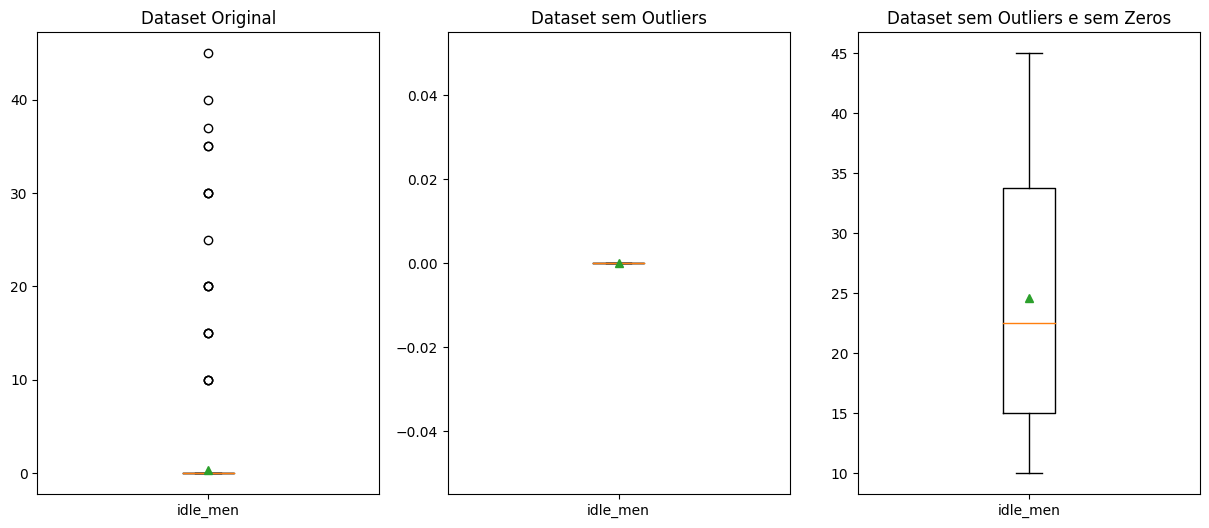

In [203]:
# Retirar os outliers da coluna idle_time
coluna='idle_men'
dataset_idle_men_sem_outliers=retirar_outliers(dataset,coluna)
dataset_idle_men_sem_outliers_zeros=retirar_outliers(dataset[dataset[coluna]>0],coluna)
fig, axes=plt.subplots(nrows=1, ncols=3,figsize=(15,6))
axes[0].boxplot(dataset[coluna], showmeans=True);
axes[0].set_title('Dataset Original');
axes[0].set_xticklabels([coluna]);
axes[1].boxplot(dataset_idle_men_sem_outliers[coluna], showmeans=True);
axes[1].set_title('Dataset sem Outliers');
axes[1].set_xticklabels([coluna]);
axes[2].boxplot(dataset_idle_men_sem_outliers_zeros[coluna], showmeans=True);
axes[2].set_xticklabels([coluna]);
axes[2].set_title('Dataset sem Outliers e sem Zeros');

print("Dataset Original: "+str(dataset[coluna].count()))
print("Dataset sem outliers: "+str(dataset_idle_men_sem_outliers[coluna].count()))
print("Dataset sem outliers e sem zeros: "+str(dataset_idle_men_sem_outliers_zeros[coluna].count()))

In [204]:
dataset_idle_men_sem_outliers_zeros[coluna].describe()

count    18.000000
mean     24.555556
std      11.089063
min      10.000000
25%      15.000000
50%      22.500000
75%      33.750000
max      45.000000
Name: idle_men, dtype: float64

Detalhe que a quantidade de trabalhores impactados nas interrupções indevidas já apresentam uma distribuição sem distorções somente removendo os zeros do dataset, além dos *outliers*.

##4.3. Verificação dos atributos categóricos
Nesta seção será avaliada a distribuição dos dados por cada atributo categórico: **no_of_style_change**, **department**, **team**, **day** e **quarter**.

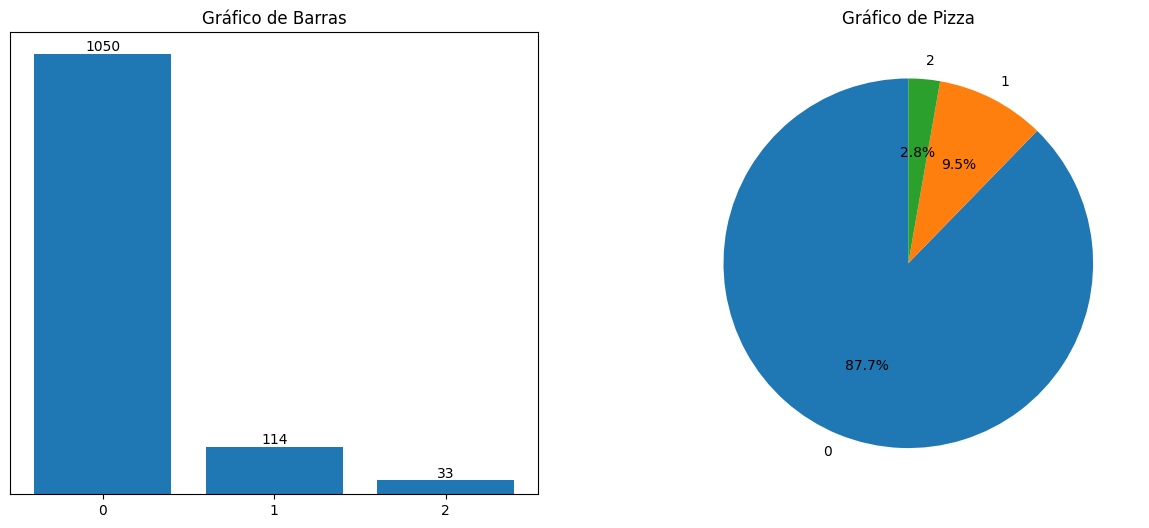

In [205]:
# Para a coluna no_of_style_change, fez mais sentido em utilizar os valores como
# classes e contabilizar a quantidade destes dados no dataset
dataset_style_change=dataset.groupby('no_of_style_change')['no_of_style_change'].count()
x=dataset_style_change.index
y=dataset_style_change.values

# Criação de Subplots
fig, axes=plt.subplots(nrows=1, ncols=2,figsize=(15,6))

# Plotagem do Gráfico de Barras na posição 1
axes[0].bar(x,y);
axes[0].set_title('Gráfico de Barras')
axes[0].set_yticks([])

# Adicionando rótulos de dados no Gráfico de Barras (primeiro subplot)
for i, v in enumerate(y):
    axes[0].annotate(str(v), xy=(i, v), ha='center', va='bottom')

# Plotagem do Gráfico de Pizza na posição 2
axes[1].pie(y, labels=x, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Gráfico de Pizza')

plt.show()

Verificamos que para a coluna **no_of_style_change** há um grande acumulo registro com nenhuma mudança de escopo.

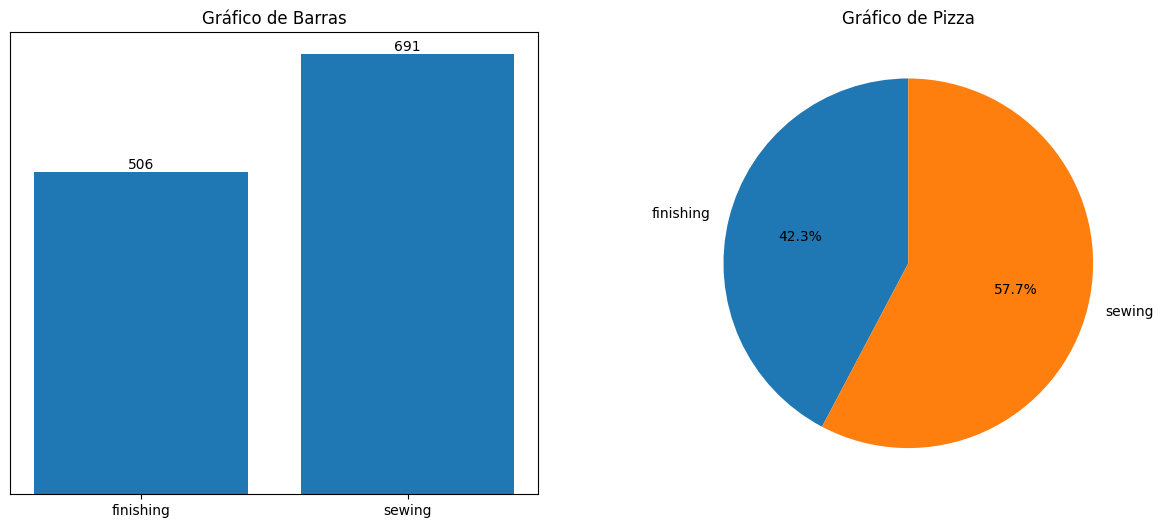

In [206]:
# Para a coluna department, fez mais sentido em utilizar os valores como
# classes e contabilizar a quantidade destes dados no dataset
dataset_style_change=dataset.groupby('department')['department'].count()
x=dataset_style_change.index
y=dataset_style_change.values

# Criação de Subplots
fig, axes=plt.subplots(nrows=1, ncols=2,figsize=(15,6))

# Plotagem do Gráfico de Barras na posição 1
axes[0].bar(x,y);
axes[0].set_title('Gráfico de Barras')
axes[0].set_yticks([])

# Adicionando rótulos de dados no Gráfico de Barras (primeiro subplot)
for i, v in enumerate(y):
    axes[0].annotate(str(v), xy=(i, v), ha='center', va='bottom')

# Plotagem do Gráfico de Pizza na posição 2
axes[1].pie(y, labels=x, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Gráfico de Pizza')

plt.show()

Para a coluna **department** a quantidade de registro começa a ficar bem distribuido.

       quantidade_demandas
count             12.00000
mean              99.75000
std                6.73019
min               88.00000
25%               94.75000
50%               99.50000
75%              105.00000
max              109.00000


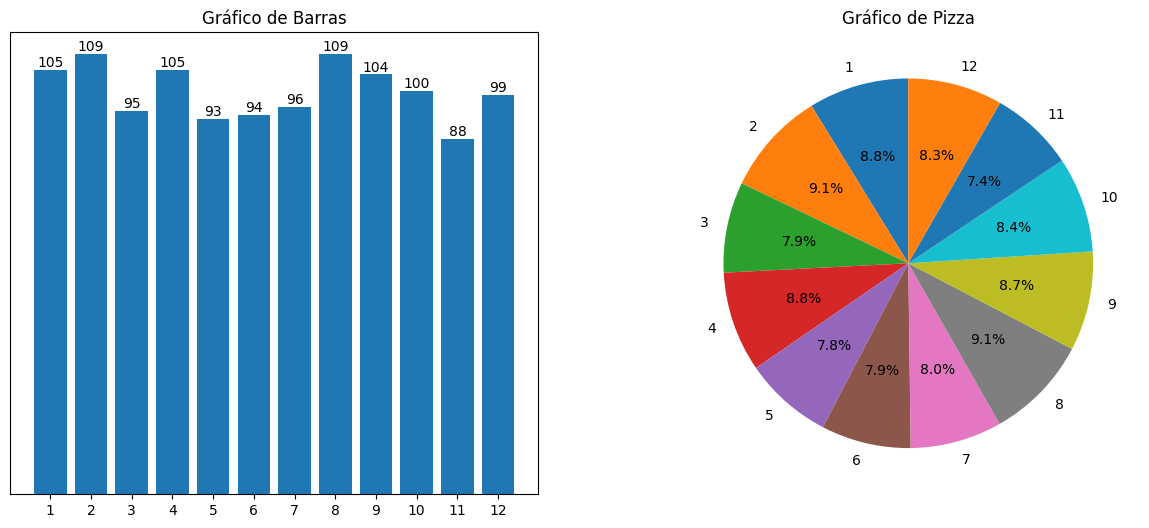

In [207]:
# Para a coluna team, fez mais sentido em utilizar os valores como
# classes e contabilizar a quantidade destes dados no dataset
dataset_style_change=dataset.groupby('team')['team'].count()
x=dataset_style_change.index
y=dataset_style_change.values

# Criação de Ordem para os dados referentes às Equipes (team)
order=['1','2','3','4','5','6', '7', '8', '9', '10', '11', '12']

# y reordenado conforme item anterior
y_order=y[[x.tolist().index(order[i]) for i in range(len(x))]]

# Criação de Subplots
fig, axes=plt.subplots(nrows=1, ncols=2,figsize=(15,6))

# Plotagem do Gráfico de Barras na posição 1
axes[0].bar(order,y_order);
axes[0].set_title('Gráfico de Barras')
axes[0].set_yticks([])

# Adicionando rótulos de dados no Gráfico de Barras (primeiro subplot)
for i, v in enumerate(y_order):
    axes[0].annotate(str(v), xy=(i, v), ha='center', va='bottom')

# Plotagem do Gráfico de Pizza na posição 2
axes[1].pie(y_order, labels=order, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Gráfico de Pizza')

print(pd.DataFrame(y,columns=['quantidade_demandas']).describe())

plt.show()

Existe uma distribuição da quantidade de registro por Equipe (coluna **team**) uniforme, demonstrando que talvez exista uma boa distribuição de demandas por equipe.

       quantidade_demandas
count             6.000000
mean            199.500000
std               6.978539
min             187.000000
25%             199.000000
50%             200.000000
75%             202.500000
max             208.000000


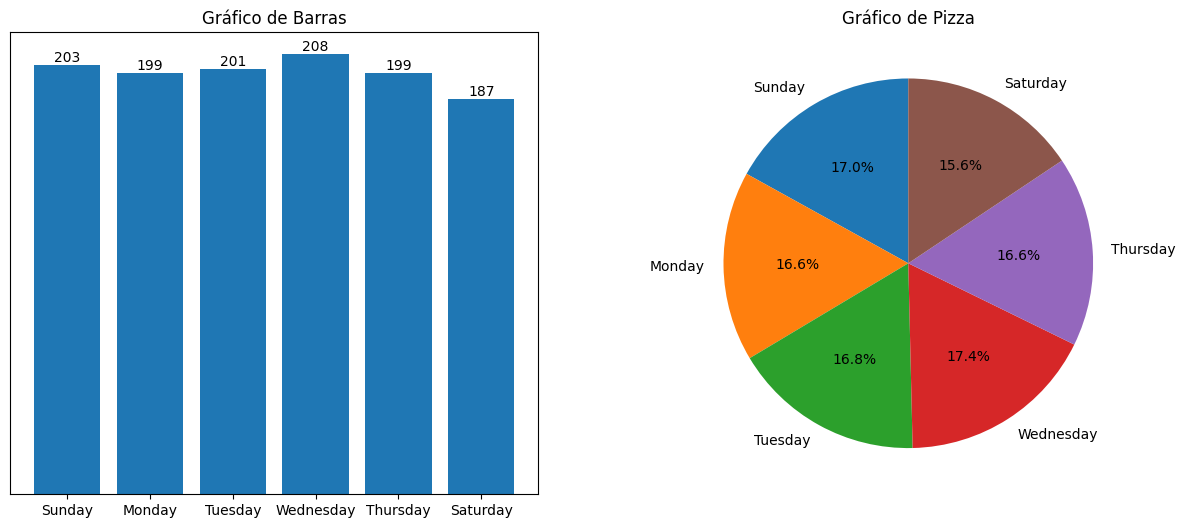

In [208]:
# Para a coluna day, fez mais sentido em utilizar os valores como
# classes e contabilizar a quantidade destes dados no dataset
dataset_style_change=dataset.groupby('day')['day'].count()
x=dataset_style_change.index
y=dataset_style_change.values

# Criação de Ordem para os dados referentes aos dias da semana
order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Saturday']

# y reordenado conforme item anterior
y_order=y[[x.tolist().index(order[i]) for i in range(len(x))]]

# Criação de Subplots
fig, axes=plt.subplots(nrows=1, ncols=2,figsize=(15,6))

# Plotagem do Gráfico de Barras na posição 1
axes[0].bar(order,y_order);
axes[0].set_title('Gráfico de Barras')
axes[0].set_yticks([])

# Adicionando rótulos de dados no primeiro subplot
for i, v in enumerate(y_order):
    axes[0].annotate(str(v), xy=(i, v), ha='center', va='bottom')

# Plotagem do Gráfico de Pizza na posição 2
axes[1].pie(y_order, labels=order, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Gráfico de Pizza')

print(pd.DataFrame(y,columns=['quantidade_demandas']).describe())

plt.show()

Da mesma forma, para a coluna **day** também tem os registro bem distribuídos. Detalhe para a ausência de registro para *Friday*, como já havia destacado antes.

       quantidade_demandas
count             5.000000
mean            239.400000
std             125.302833
min              44.000000
25%             210.000000
50%             248.000000
75%             335.000000
max             360.000000


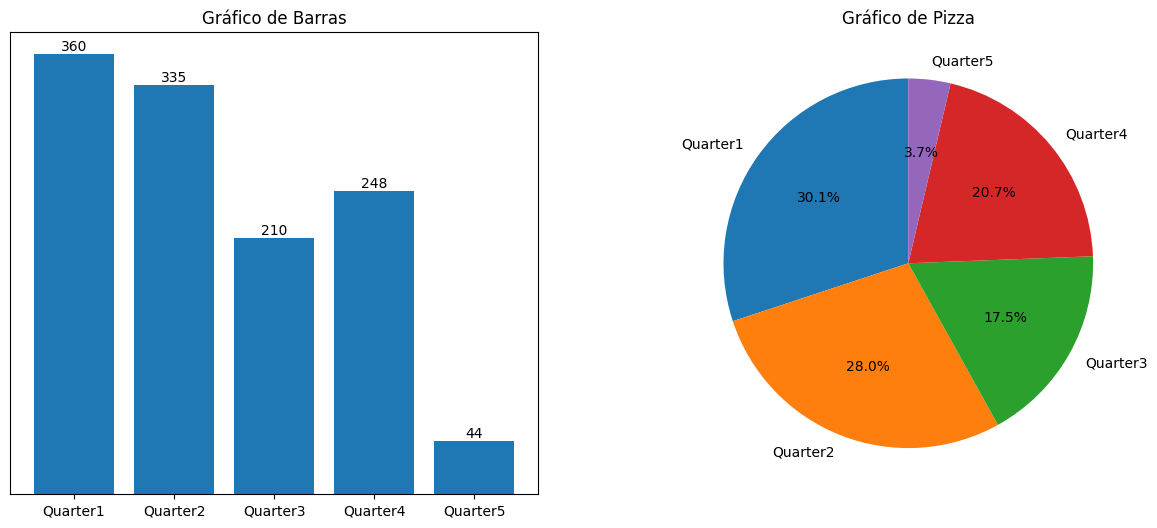

In [209]:
# Para a coluna quarter, fez mais sentido em utilizar os valores como
# classes e contabilizar a quantidade destes dados no dataset
dataset_style_change=dataset.groupby('quarter')['quarter'].count()
x=dataset_style_change.index
y=dataset_style_change.values

# Criação de Subplots
fig, axes=plt.subplots(nrows=1, ncols=2,figsize=(15,6))

# Plotagem do Gráfico de Barras na posição 1
axes[0].bar(x,y);
axes[0].set_title('Gráfico de Barras')
axes[0].set_yticks([])

# Adicionando rótulos de dados no primeiro subplot
for i, v in enumerate(y):
    axes[0].annotate(str(v), xy=(i, v), ha='center', va='bottom')

# Plotagem do Gráfico de Pizza na posição 2
axes[1].pie(y, labels=x, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Gráfico de Pizza')

print(pd.DataFrame(y,columns=['quantidade_demandas']).describe())

plt.show()

Para a coluna **quarter**, a distribuição dos registro não é uniforme. Isso se deve ao fato que nem todos meses possuem 5 semanas (menor concentração no *Quarter5*) e como os dados terminam no dia 11 do mês de março, há uma tendência de concentração maior nos *Quarter1* e *Quarter2*.

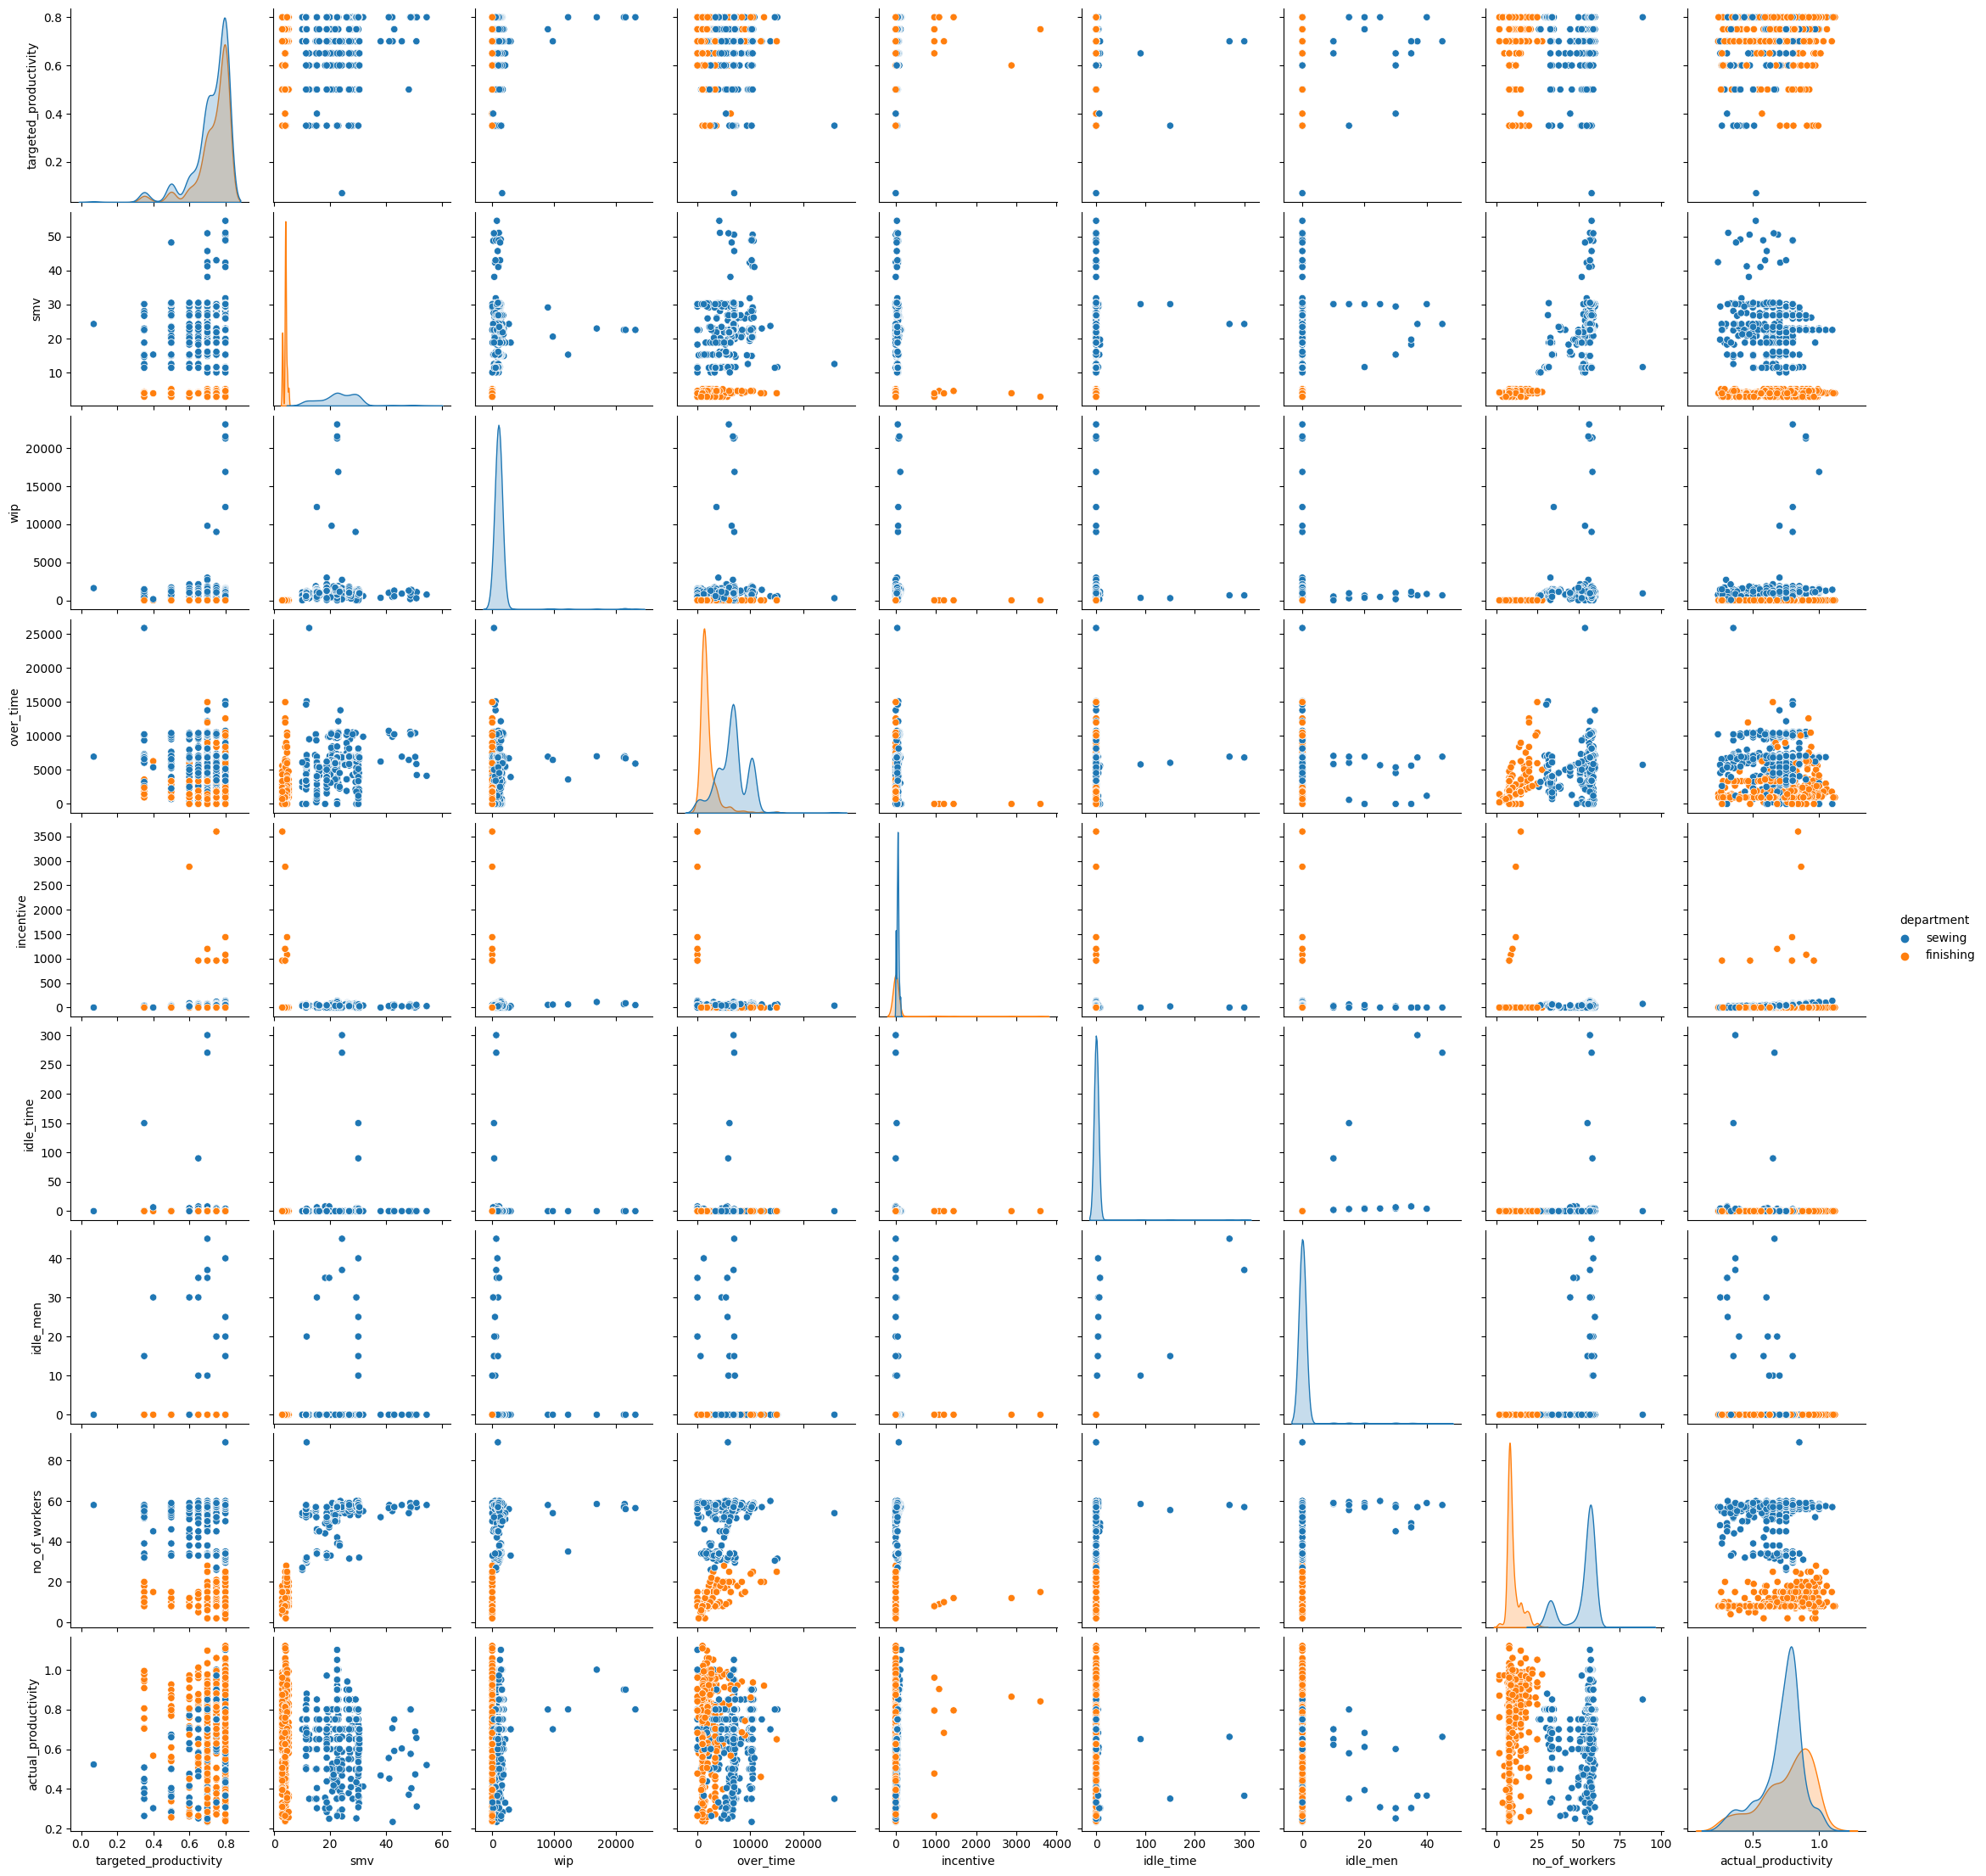

In [210]:
sns.pairplot(dataset,hue='department');

Como podemos perceber, existe um comportamento diferente dos dados para cada tipo de departamento, tais como para o departamento de acabamento (*finishing*), temos o menor número de trabalhadores (*no_of_workers*), maior produtividade (*actual_productivity*), maior incentivo (*incentive*), menor número de horas extras (*over_time*), menor tempo alocado por tarefa (*smv*), menor backlog (*wip*).

A seguir, demonstramos em particular a distribuição do número de trabalhadores por departamento com **boxplot**.

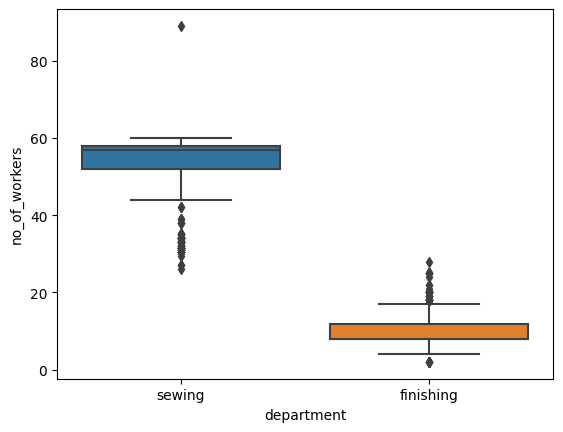

In [211]:
# Distribuição do número de trabalhadores (no_of_workers) por departamento (department)
sns.boxplot(data=dataset,x='department',y='no_of_workers');

Como podemos percerber, a distribuição de número de trabalhadores é diferente por departamento: sewing (costura) necessita de maior número (entre 40 e 60 trabalhores) e finishing (acabamento) (menos de 20 trabalhores). 

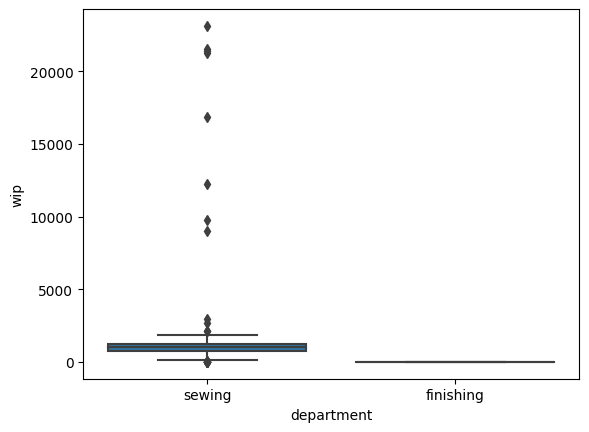

In [212]:
# Distribuição do Backlog (wip) por departamento (department)
sns.boxplot(data=dataset,x='department',y='wip');

Mesmo assim, a departamento de costura apresenta o maior backlog (itens faltantes - **wip**)

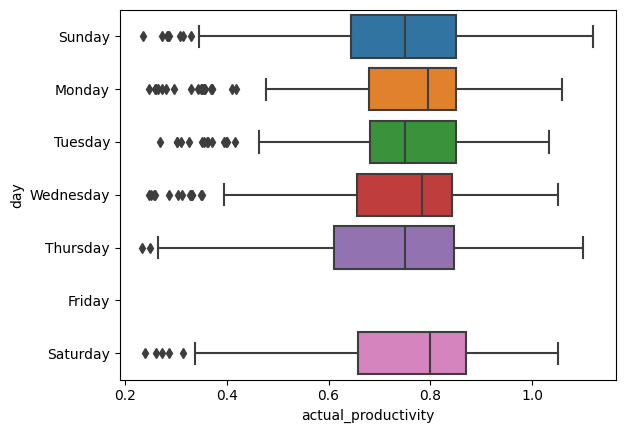

In [213]:
# Análise da produtividade atual por dia da semana
sns.boxplot(data=dataset,y='day',x='actual_productivity',order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], orient='h');

O resultado da produtividade não se altera significativamente por dia da semana: a caixa do boxplot entre 0.65 e 0.85, aproximadamente.

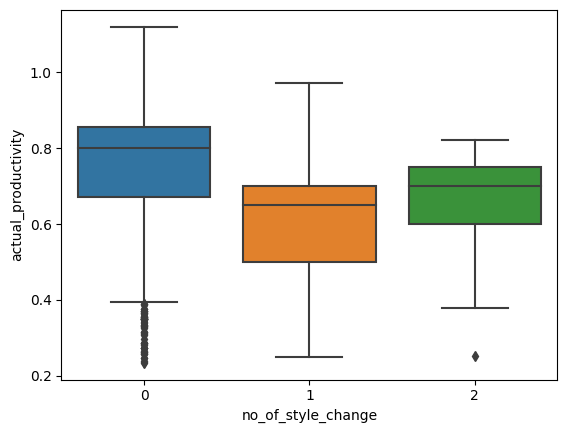

In [214]:
# Análise da distribuição da produtividade atual por número de mudanças de estilo
sns.boxplot(data=dataset,x='no_of_style_change',y='actual_productivity');

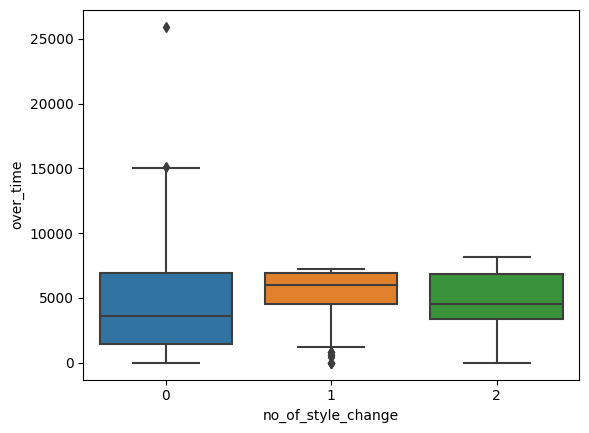

In [215]:
# Análise da Distribuição das horas extras (over_time) por mudança de estilo
sns.boxplot(data=dataset,x='no_of_style_change',y='over_time');

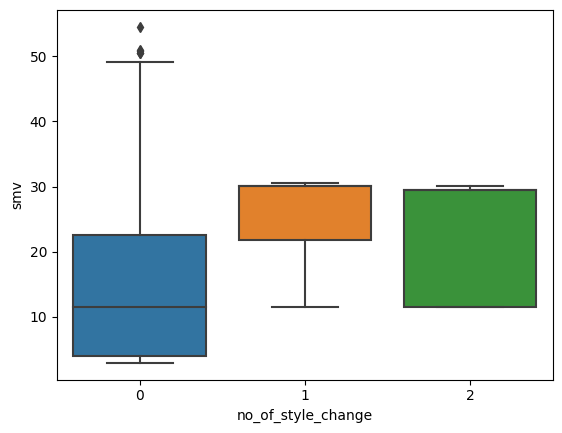

In [216]:
# Análise do tempo alocado para a tarefa (smv) por mudança de estilo
sns.boxplot(data=dataset,x='no_of_style_change',y='smv');

##4.4 Separação em conjunto de treino e conjunto de teste

In [217]:
# Separando os valores do dataset em componentes de input (X) e output (Y)
X = dataset.loc[:,['date','department','team','no_of_style_change','day']]
Y = dataset.loc[:,['actual_productivity']]

Para os dados de treino e teste, selecionamos as colunas **date**, **depatment**, **team**, **no_of_style_change** e **day**.

Como alvo, selecionamos a produtividade atual (**actual_productivity**).

In [218]:
print('Dados de X')
print(X)
print('Dados de Y')
print(Y)

Dados de X
           date department team no_of_style_change        day
0    2015-01-01     sewing    8                  0   Thursday
1    2015-01-01  finishing    1                  0   Thursday
2    2015-01-01     sewing   11                  0   Thursday
3    2015-01-01     sewing   12                  0   Thursday
4    2015-01-01     sewing    6                  0   Thursday
...         ...        ...  ...                ...        ...
1192 2015-03-11  finishing   10                  0  Wednesday
1193 2015-03-11  finishing    8                  0  Wednesday
1194 2015-03-11  finishing    7                  0  Wednesday
1195 2015-03-11  finishing    9                  0  Wednesday
1196 2015-03-11  finishing    6                  0  Wednesday

[1197 rows x 5 columns]
Dados de Y
      actual_productivity
0                0.940725
1                0.886500
2                0.800570
3                0.800570
4                0.800382
...                   ...
1192             0.628333
1

In [219]:
# Separação em bases de treino e teste, dados estratificados conforme coluna 'no_of_style_change'
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,
                                                    random_state=7,stratify=X['no_of_style_change'])

In [220]:
print(X_train.info())
print(X_train.groupby('no_of_style_change').count())

print(X_test.info())
print(X_test.groupby('no_of_style_change').count())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 565 to 80
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                957 non-null    datetime64[ns]
 1   department          957 non-null    object        
 2   team                957 non-null    object        
 3   no_of_style_change  957 non-null    object        
 4   day                 957 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 44.9+ KB
None
                    date  department  team  day
no_of_style_change                             
0                    840         840   840  840
1                     91          91    91   91
2                     26          26    26   26
<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 667 to 44
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              ------------

##4.5 Transformações Numéricas e Categóricas

Para evitar vazamento de dados (data leakage), as Transformações Numéricas e Categóricas serão realizadas após a separação dos conjuntos de treino e teste.

In [221]:
# Transformações Categóricas nas colunas departmente, team, no_of_style_change e day
encoded_X_train = OneHotEncoder(sparse=False).fit_transform(X_train.loc[:,['department','team','no_of_style_change','day']])
print(encoded_X_train[:5,:])
encoded_X_test = OneHotEncoder(sparse=False).fit_transform(X_test.loc[:,['department','team','no_of_style_change','day']])
print(encoded_X_test[:5,:])

[[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [222]:
# Transformações Numérica nas coluna date
# Definindo o transformador como MinMaxScaler
min_max_date_scaler=MinMaxScaler()

# Ajustando os dados de treino no transformador
rescaled_Date_train= min_max_date_scaler.fit_transform(X_train.loc[:,['date']])
print(rescaled_Date_train[:5,:])

# Transformando os dados de teste conforme os ajustes setados no transformador
rescaled_Date_test= min_max_date_scaler.transform(X_test.loc[:,['date']])
print(rescaled_Date_test[:5,:])

[[0.46376812]
 [0.20289855]
 [0.44927536]
 [0.07246377]
 [0.55072464]]
[[0.55072464]
 [0.17391304]
 [0.84057971]
 [0.44927536]
 [0.89855072]]


In [223]:
# Junção do resultado da transformação numérica com as transformações categóricas

# Dados de treino
encoded_rescaled_X_train= np.concatenate((rescaled_Date_train, encoded_X_train), axis=1)
print(encoded_rescaled_X_train[:5,:])

# Dados de teste
encoded_rescaled_X_test= np.concatenate((rescaled_Date_test, encoded_X_test), axis=1)
print(encoded_rescaled_X_test[:5,:])

[[0.46376812 0.         1.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  1.         0.         0.         0.         0.         0.        ]
 [0.20289855 0.         1.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         1.         0.         0.        ]
 [0.44927536 0.         1.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         1.         0.         0.         0.        ]
 [0.07246377 0.         1.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         1.         0.        ]
 [0.

In [224]:
# Normalizando os dados com o método MinMaxScaler

# Definindo o transformador como MinMaxScaler
min_max_Y_scaler=MinMaxScaler()

# Ajustando os dados de treino no transformador
rescaled_Y_train = min_max_Y_scaler.fit_transform(Y_train)
print(rescaled_Y_train[:5,:])

# Transformando os dados de teste conforme os ajustes setados no transformador
rescaled_Y_test = min_max_Y_scaler.transform(Y_test)
print(rescaled_Y_test[:5,:])

[[0.75155094]
 [0.41341271]
 [0.80800114]
 [0.69558426]
 [0.42459598]]
[[0.58227547]
 [0.69517202]
 [0.58269017]
 [0.6956179 ]
 [0.40415576]]


In [225]:
# Aplicação dos dados de treino para o modelo LinearRegression
regr = LinearRegression().fit(encoded_rescaled_X_train, rescaled_Y_train)
predictions=regr.predict(encoded_rescaled_X_test)
regr.score(encoded_rescaled_X_test, rescaled_Y_test) # R^2 do modelo

0.07157647770950248

O resultado apresentado foi muito baixo, o que exigirá outra abordagem do problema para Machine Learning.